In [1]:
import  tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import os
os.environ["OMP_NUM_THREADS"] = '4'
import scipy.io as scio
import numpy as np
import random
import sklearn.svm as svm
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.svm import SVC
from tools import *
from sklearn.manifold import TSNE
from Data_import import data_frame
from model_evaluation import *
from ClusterNN import cluster_NN,svm_classifier
# CSIs = np.zeros((4,4))
encoded_clsuter_dims = np.array([4,10,20,30])
AUCs = np.zeros((encoded_clsuter_dims.size,4))
for count,encoded_clsuter_dim in enumerate(encoded_clsuter_dims):
    metric_values_iterations_dims = scio.loadmat(f'./results_save/metric_values_iterations_encodedDim{encoded_clsuter_dim}_clusterDim{encoded_clsuter_dim}_1000.mat')
    metric_values = metric_values_iterations_dims['metric_values']
    ACC_TRAIN = metric_values['ACC_TRAIN'][0,0]
    PTA = metric_values['PTA'][0,0]
    ACC_TEST = metric_values['ACC_TEST'][0,0]
    AUC = metric_values['AUC'][0,0]
    CSI = metric_values['CSI'][0,0]
#     selected_index = np.argmax(np.sum(AUC,axis = 1))
    selected_index = -1
    AUCs[count,::] = AUC[selected_index,::]

D:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Text(0, 0.5, 'AUC value')

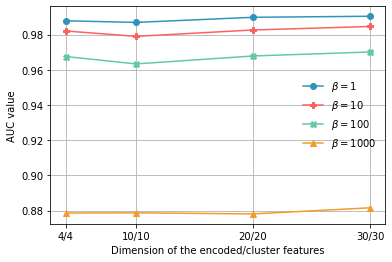

In [2]:
all_colors = ['#2E94B9',"#fa625f",'#62C8A5','#f29c2b']
plt.figure()
plt.plot(encoded_clsuter_dims, AUCs[::,0],'o-', color = all_colors[0],label = r'$\beta=1$')
plt.plot(encoded_clsuter_dims, AUCs[::,1],'P-', color = all_colors[1],label = r'$\beta=10$')
plt.plot(encoded_clsuter_dims, AUCs[::,2],'X-', color = all_colors[2],label = r'$\beta=100$')
plt.plot(encoded_clsuter_dims, AUCs[::,3],'^-', color = all_colors[3],label = r'$\beta=1000$')
plt.xticks(encoded_clsuter_dims,['4/4','10/10','20/20','30/30'])
plt.grid()
plt.legend(frameon=False)
plt.xlabel('Dimension of the encoded/cluster features')
plt.ylabel('AUC value')
# plt.savefig(f'../figures/encoded_cluster_dims_cmp.png',dpi=600)
# plt.savefig(f'../figures/encoded_cluster_dims_cmp.png',dpi=600)
# plt.savefig(f'../figures/encoded_cluster_dims_cmp.pdf')